In [2]:
import pandas as pd 
import os

data_path = os.path.abspath('')

In [3]:

## READ IN CPI INDEX NUMBERS

index_cv = f'{data_path}/data/CPI_All_Time_Series/640105.xls'
in_df = pd.read_excel(index_cv, sheet_name="Data1")

# include = ['Unnamed: 0', 'Index Numbers ;  Bread ;  Australia ;', "Index Numbers ;  Fruit ;  Australia ;", 'Index Numbers ;  Meat and seafoods ;  Australia ;', "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Rents ;  Australia ;", "Index Numbers ;  Clothing and footwear ;  Australia ;"]

# include = ['Unnamed: 0', 'Index Numbers ;  Meat and seafoods ;  Australia ;', "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Rents ;  Australia ;"]


# include = ['Unnamed: 0', "Index Numbers ;  Medical, dental and hospital services ;  Australia ;", "Index Numbers ;  Child care ;  Australia ;", "Index Numbers ;  Housing ;  Australia ;", "Index Numbers ;  Utilities ;  Australia ;"]

mihl = [('Unnamed: 0',"Date"),("Index Numbers ;  Food and non-alcoholic beverages ;  Australia ;", "Food"), ("Index Numbers ;  Clothing and footwear ;  Australia ;", "Clothing"), ("Index Numbers ;  Transport ;  Australia ;", "Transport"), ("Index Numbers ;  Health ;  Australia ;", "Health"), ("Index Numbers ;  Personal care products ;  Australia ;", "Personal care"), ("Index Numbers ;  Recreation and culture ;  Australia ;", "Recreation")]

# include = mihl

# speci = ['Unnamed: 0', "Index Numbers ;  Rents ;  Australia ;", "Index Numbers ;  Milk ;  Australia ;", "Index Numbers ;  Fruit ;  Australia ;", "Index Numbers ;  Vegetables ;  Australia ;", "Index Numbers ;  Snacks and confectionery ;  Australia ;", "Index Numbers ;  Garments ;  Australia ;"]


include = [x[0] for x in mihl]
# include = speci 

in_df = in_df[include]

for thing in mihl:
    in_df.rename(columns={thing[0]:thing[1]}, inplace=True)



headers = in_df.loc[0]

in_df = in_df[9:]

in_df['Date'] = pd.to_datetime(in_df['Date'])

# print(in_df['Unnamed: 0'])

for thing in mihl[1:]:
    in_df[thing[1]] = pd.to_numeric(in_df[thing[1]])

in_df = pd.melt(in_df, id_vars='Date')

# in_df = in_df.rename(columns={"Unnamed: 0":"Date"})
print(in_df)



           Date    variable  value
0    1948-09-01        Food    NaN
1    1948-12-01        Food    NaN
2    1949-03-01        Food    NaN
3    1949-06-01        Food    NaN
4    1949-09-01        Food    NaN
...         ...         ...    ...
1735 2019-12-01  Recreation  108.3
1736 2020-03-01  Recreation  106.5
1737 2020-06-01  Recreation  105.4
1738 2020-09-01  Recreation  106.6
1739 2020-12-01  Recreation  108.3

[1740 rows x 3 columns]


In [4]:
## READ IN AVERAGE RETAIL PRICES
avg_p_cv = f'{data_path}/data/6403055001do001_201106.xls'
avg_df = pd.read_excel(avg_p_cv, sheet_name="Table_1", skiprows=4)

# print(avg_df.columns)


In [5]:
ub_ceevee = f'{data_path}/data/unemploymentsicknessandbenefits.xlsx'

ub_df = pd.read_excel(ub_ceevee)
ub_df = ub_df[['Date of effect', '21 years']]
ub_df = ub_df.dropna()

ub_df['Date of effect'] = pd.to_datetime(ub_df['Date of effect'])

ub_hundert = ub_df.loc[ub_df['Date of effect'] == '20/9/2011']['21 years'].values

ub_df['ub_index'] = (ub_df['21 years']/ub_hundert)*100

ub_df = ub_df[['Date of effect', "ub_index"]]

ub_df = ub_df.rename(columns={'Date of effect':"Date", "ub_index": "value"})
ub_df["variable"] = 'UB Index for singles over 21'

print(ub_df)




         Date       value                      variable
0  1969-09-27    4.108463  UB Index for singles over 21
1  1970-09-28    4.108463  UB Index for singles over 21
2  1971-09-29    4.108463  UB Index for singles over 21
3  1972-02-25    6.984388  UB Index for singles over 21
4  1972-09-27    6.984388  UB Index for singles over 21
..        ...         ...                           ...
95 2018-09-20  113.023829  UB Index for singles over 21
96 2019-03-20  114.153657  UB Index for singles over 21
97 2019-09-20  114.831553  UB Index for singles over 21
98 2020-03-20  116.207888  UB Index for singles over 21
99 2020-09-20  116.207888  UB Index for singles over 21

[100 rows x 3 columns]


In [8]:
# combined = pd.merge(ub_df, in_df, left_on="Date of effect", right_on="Unnamed: 0", how="left")
combined = pd.concat([ub_df, in_df])


import datetime 

cutoff_date = datetime.date(1990, 1, 1)
print(combined.size)
combined = combined.loc[combined['Date'] > datetime.datetime.combine(cutoff_date, datetime.datetime.min.time())]

print(combined)

with open(f'{data_path}/data/MIHL_UB_index_pivoted.csv', "w") as f:
    combined.to_csv(f, index=False, header=True)

print(combined)

5520
           Date       value                      variable
38   1990-04-18   53.410025  UB Index for singles over 21
39   1990-09-20   55.176664  UB Index for singles over 21
40   1991-09-20   57.046015  UB Index for singles over 21
41   1992-03-20   57.908792  UB Index for singles over 21
42   1992-09-20   57.908792  UB Index for singles over 21
...         ...         ...                           ...
1735 2019-12-01  108.300000                    Recreation
1736 2020-03-01  106.500000                    Recreation
1737 2020-06-01  105.400000                    Recreation
1738 2020-09-01  106.600000                    Recreation
1739 2020-12-01  108.300000                    Recreation

[806 rows x 3 columns]
           Date       value                      variable
38   1990-04-18   53.410025  UB Index for singles over 21
39   1990-09-20   55.176664  UB Index for singles over 21
40   1991-09-20   57.046015  UB Index for singles over 21
41   1992-03-20   57.908792  UB Index for s

<AxesSubplot:xlabel='Date', ylabel='value'>

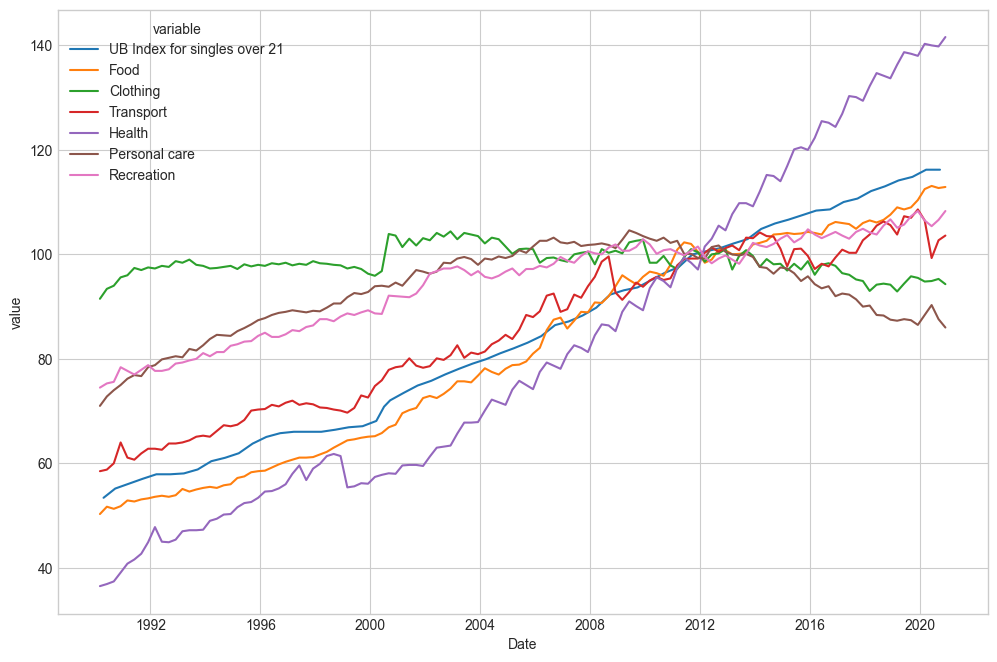

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sns.lineplot(data = combined, x="Date", y="value", hue="variable")

# sns.lineplot(data = in_df, x="Unnamed: 0", y="Index Numbers ;  Meat and seafoods ;  Australia ;")
# # sns.lineplot(data = in_df, x="Unnamed: 0")